All results reported in the paper can be reproduced in this notebook (N.B. All up, this takes a couple minutes to run)

In [1]:
import numpy as np
import interferometer as itf
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram
from interferometer_circuits.numeric_truncated_unitaries import *
from interferometer_circuits.direct_decomposition import *
from interferometer_circuits.boson_sampling_probabilities import *
from interferometer_circuits.simulation import *
from qiskit.quantum_info import Operator

### Circuit plots

In [2]:
# def change_basis(n, basis, num_digits):

#     assert(n <= basis ** num_digits)
#     digits = [0] * num_digits
#     # array_sum = 0

#     for pow in range(num_digits-1 , -1, -1):
#         k = basis ** pow
#         quotient = n // k
#         digits[pow] = quotient
#         n -= quotient * k

#         # array_sum += quotient
#         # if array_sum > 
        
#     return reversed(digits)

# list(change_basis(27, 3, 10))

In [3]:
# def change_basis(n, basis, num_digits):

#     digits = [0] * num_digits
#     assert(n <= basis ** num_digits)
#     for pow in range(num_digits - 1 , -1, -1):
#         k = basis ** pow
#         quotient = n // k
#         digits[pow] = quotient
#         n -= quotient * k
#     return reversed(digits)


# def partition_generator(n, array_length):
    
#     if array_length == 1:
#         return [[n]]
    
#     valid_partitions = []
#     basis = n + 1
#     for k in range(1, array_length ** basis):

#         # possible_partition = [0] * (array_length)

#         possible_partition = list(change_basis(k, basis, array_length))
#         if sum(possible_partition) == n:
#             valid_partitions.append(possible_partition)


        # for pow in range(array_length - 1, -1, -1):
        #     d = basis ** pow
        #     quotient = n // d
        #     possible_partition[pow] = quotient
        #     n -= quotient * d
            # partition_sum += quotient
            # if partition_sum > n:
            #     continue

#     return valid_partitions

# partition_generator(3, 2)

In [4]:
def partition_generator(length, total_sum, max_value):
    """
    Creates a generator of all possible integer partitions for an array
    of length `length` where each entry can have a value up to and including
    `max_value`.

    length: (int) length of array
    total_sum: (int)
    max_value: (int)

    Code credit: dankal444
    https://stackoverflow.com/questions/69874277/how-to-iterate-over-the-set-of-arrays-with-a-fixed-sum

    I've renamed some things and added comments for a (hopefully) easier reading experience
    """
    if length == 1:
        yield (total_sum,)
    else:
        for value in range(max(0, total_sum - (length - 1) * max_value),
                               min(max_value, total_sum) + 1):
            for permutation in partition_generator(length - 1, total_sum - value, max_value):
                yield (value,) + permutation

# L = list(sums(7, 5, 4))

In [5]:
U = np.load("3x3unitary.npy")

initial_dist = [2,1,0]
possible_dists = list(partition_generator(length = 3, total_sum = 3, max_value = 3))

analytic_probs = dict()
for dist in possible_dists:
    prob = output_probability(initial_dist, dist, U)
    # state = dist_to_state(dist)
    analytic_probs[str(dist)] = prob

probs_1e5 = run_interferom_simulation(U, initial_dist, 1e5)

fig = plot_histogram([probs_1e5, analytic_probs], 
                title='Random 3x3 interferometer with three photons', bar_labels=False, 
                legend=["Circuit", "Permanent"])

Num qubits 6
Circuit depth = 567


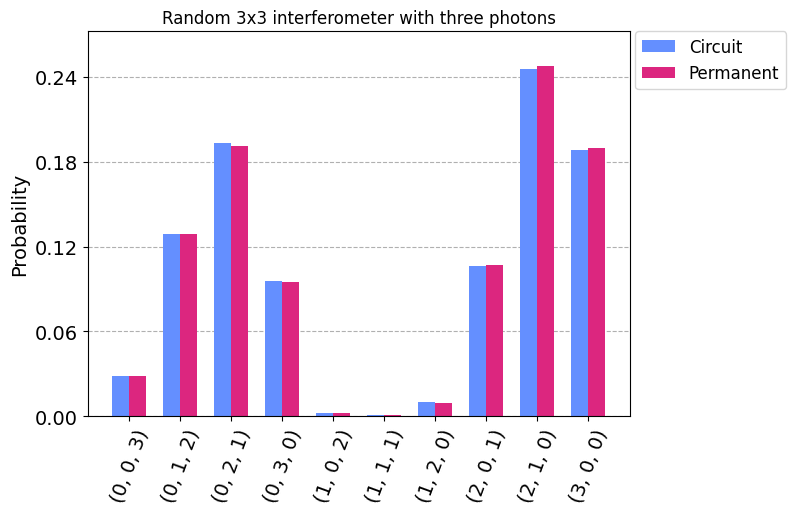

In [6]:
fig = plot_histogram([probs_1e5, analytic_probs], 
                title='Random 3x3 interferometer with three photons', bar_labels=False, 
                legend=["Circuit", "Permanent"])
fig.axes[0].set_ylabel("Probability")
fig

In [7]:
U = np.load("5x5unitary.npy")

initial_dist = [2,0,0,0,0]
possible_dists = list(partition_generator(length = 5, total_sum = 2, max_value = 2))

analytic_probs = dict()
for dist in possible_dists:
    prob = output_probability(initial_dist, dist, U)
    # state = dist_to_state(dist)
    analytic_probs[str(dist)] = prob

probs_1e5 = run_interferom_simulation(U, initial_dist, 1e5)

Num qubits 10
Circuit depth = 1972


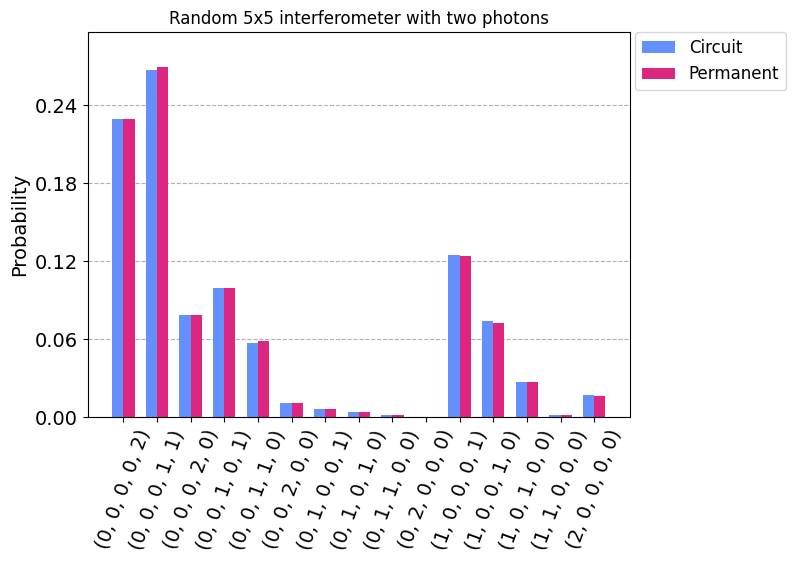

In [8]:
fig = plot_histogram([probs_1e5, analytic_probs], 
                title='Random 5x5 interferometer with two photons', bar_labels=False, 
                legend=["Circuit", "Permanent"])
fig.axes[0].set_ylabel("Probability")
fig

# Resource estimation

In [9]:
# Circuit depth for beamsplitters
photons = [1,2,4,8]

U = random_unitary(2)
for num_photons in photons:
    interferometer_circuit = direct_decomposition(U, num_photons)
    print(num_photons, interferometer_circuit.depth())

1 5
2 197
4 3653
8 60677


### Circuit depth for beamsplitters

|number of photons   |  depth |
|---|---|
| 1  | 5  |
| 2  | 197  |
| 4  | 3653  |
| 8  | 60677 | 

### Qubits per mode
|number of photons   |  qubits |
|---|---|
| 1  | 1 |
| 2  | 2 |
| 4  | 3 |
| 8  | 4 | 